## Q1

For loss of form (x-xhat)^3

## Generating dataset using numpy.random

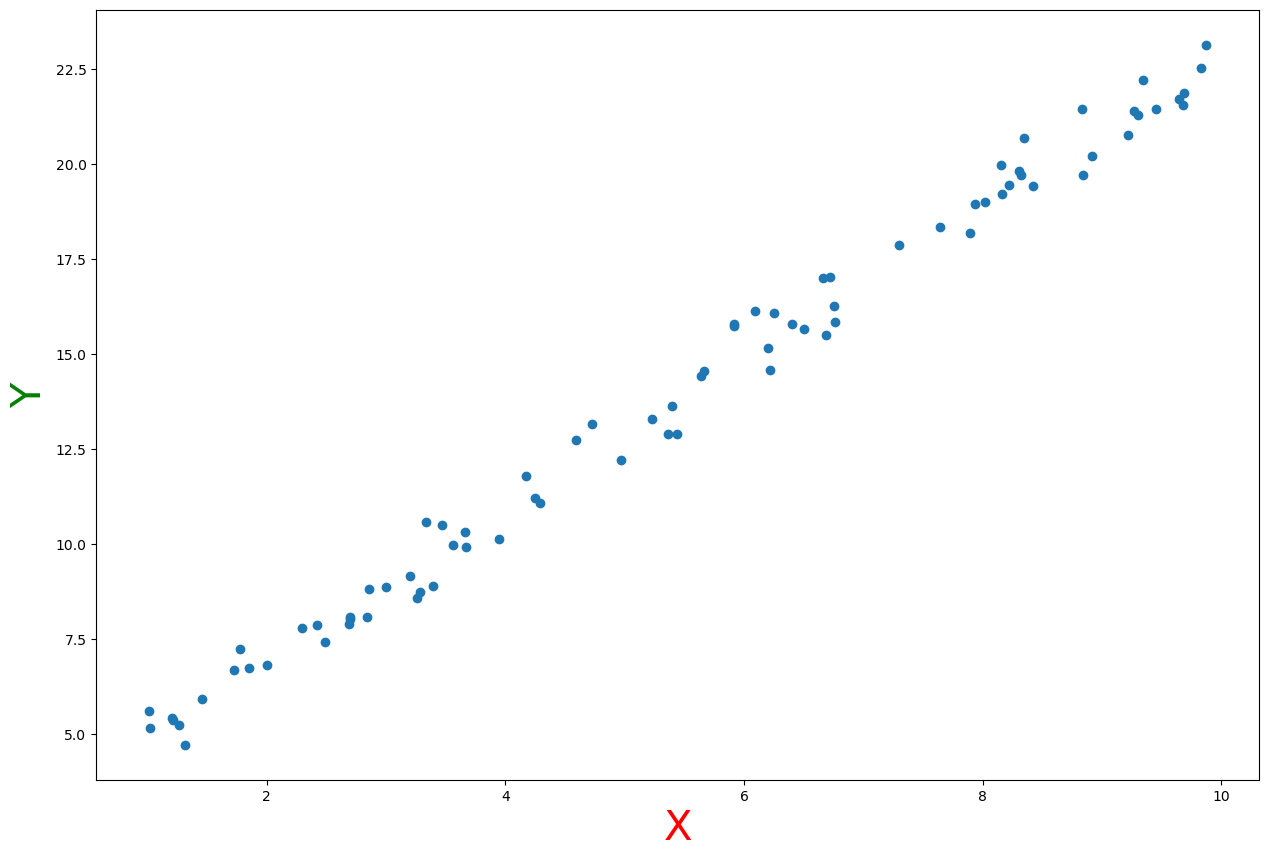

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x=np.random.RandomState(5).uniform(1,10,80)
b=(3 + np.random.RandomState(2).uniform(-1,1,80))
y=2*x + b
plt.figure(figsize=(15,10))
# print(b)
plt.xlabel("X",color='red',size=30)
plt.ylabel("Y",color='green',size=30)
plt.scatter(x,y)
plt.show()

## Loss function and cost function

In [70]:
def cost(x,xhat):
    loss= abs(x-xhat)**3
    # loss=np.abs(y-yhat)**3
    cost = loss.mean()
    return cost

## Hypothesis

In [71]:
# def hypothesis(x,w,b):
#     return w*x + b

def hypothesis(y,w,b):
    return (y-b)/w

## Gradient Descent

In [72]:
# def gradient_descent(x,y,w,b,lrate,m):
#     yhat=hypothesis(x,w,b)
#     m=len(x)
#     dw = (-3.0/m) * np.sum(np.multiply(x,((y-yhat)**2),np.sign(y-yhat)))
#     db = (-3.0/m) * np.sum(np.multiply((y-yhat)**2 , np.sign(y-yhat)))
#     w = w - (lrate * dw)
#     b = b - (lrate * db)
#     return w,b

def gradient_descent(x, y, w, b, lrate, m):
    m=len(x)
    xhat=hypothesis(y,w,b)
    dw = (3/m) * np.sum(np.multiply((x)/w,(x-xhat),np.abs(x-xhat)))
    db = (3/m) * np.sum(np.multiply(1/w,(x-xhat),np.abs(x-xhat)))
    w = w - (lrate*dw)
    b = b - (lrate*db)
    return w,b

## LINEAR REGRESSION

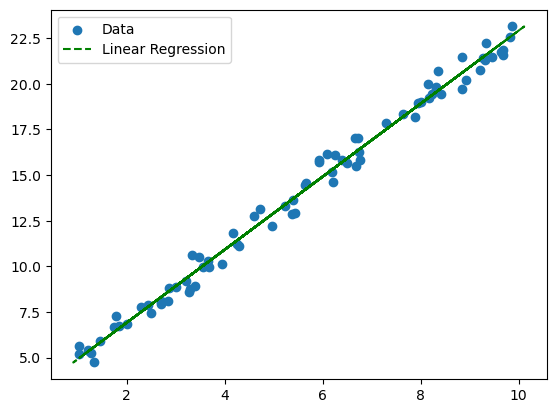

In [73]:
w = np.random.randn(1)
b = np.random.randn(1)

lrate = 0.0008
num_epochs = 400000
m=len(x)
        
L=[]
for i in range(num_epochs):
    w, b = gradient_descent(x,y,w,b,lrate, m)
    xhat = hypothesis(y,w,b)
    L.append(cost(x,xhat))
    # if (i%(num_epochs/10))==0:
    #     plt.plot(x,y,'bo')
    #     plt.plot(xhat,y,'g--')
    #     plt.show()

plt.scatter(x,y,label='Data')
plt.plot(xhat,y,'g--',label='Linear Regression')
plt.legend()
plt.show()

In [74]:
print(f'Values excepted from Linear model made from scratch:\nCoefficient(slope): {w} \nIntercept: {b}')

Values excepted from Linear model made from scratch:
Coefficient(slope): [1.99919247] 
Intercept: [2.92203997]


In [75]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model = lr.fit(x.reshape(-1,1), y.reshape(-1,1))


model.coef_ , model.intercept_


(array([[1.99919247]]), array([2.92203997]))

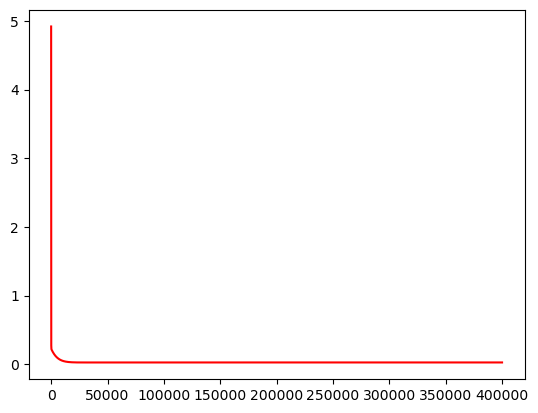

In [76]:
plt.plot(L,'r')
plt.show()



for loss of form (x-xhat)^7



## Generating dataset using numpy.random

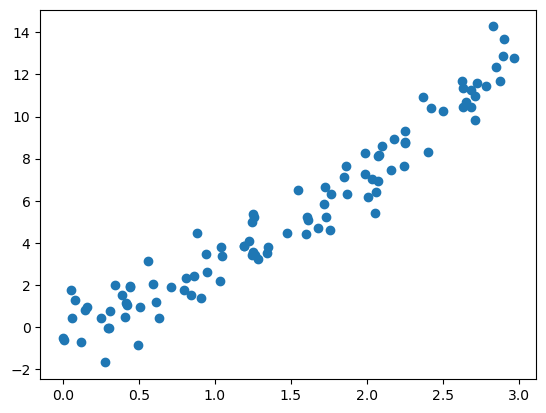

In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = 3*np.random.RandomState(1).rand(100, 1)
y = 0.8*x**2 + 2*x + np.random.RandomState(1).randn(100, 1)
plt.scatter(x, y)

In [78]:
def polyreg(x, y, degree, lrate=0.000001, iterations=10000):
    m = len(x)
    theta = np.random.randn(degree, 1)
    for _ in range(iterations):
        Xmatrix = np.column_stack([x**i for i in range(1, degree + 1)])
        error = Xmatrix.dot(theta) - y
        loss = np.mean(np.abs(error)**7)  
        lossgradient = 7 * np.dot(Xmatrix.T, (np.sign(error) * np.abs(error)**6) )/ m

        theta = theta - lrate * lossgradient

    return theta

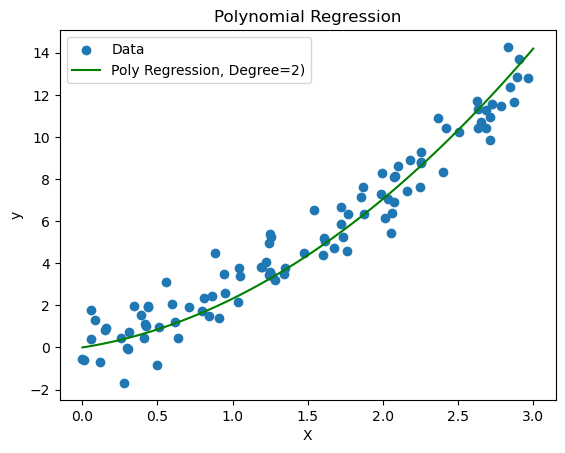

In [79]:
degree = 2

thetamatrix = polyreg(x, y, degree)

Xexp = np.linspace(0, 3, 100).reshape(-1, 1)
Xexpmatrix = np.column_stack([Xexp**i for i in range(1, degree + 1)])
Ypredmatrix = Xexpmatrix.dot(thetamatrix)

plt.scatter(x, y, label='Data')
plt.plot(Xexp, Ypredmatrix, color='green', label=f'Poly Regression, Degree={degree})')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

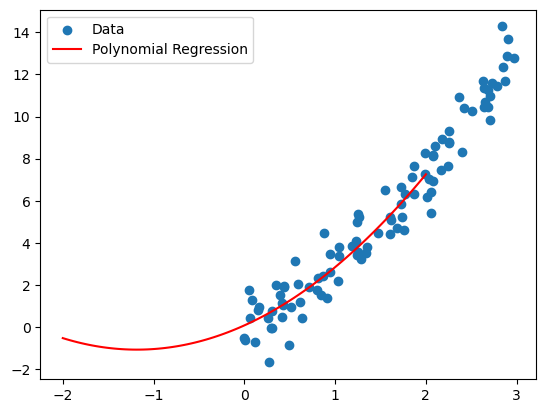

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
polyfeatures = PolynomialFeatures(degree=2, include_bias=False )
xpoly=polyfeatures.fit_transform(x)

lr=LinearRegression()
lr.fit(xpoly,y)

x_exp=np.linspace(-2,2,100).reshape(-1,1)
x_exp_poly=polyfeatures.transform(x_exp)

y_pred = lr.predict(x_exp_poly)

plt.scatter(x,y,label='Data')
plt.plot(x_exp,y_pred,color='red',label='Polynomial Regression')
plt.legend()
plt.show()